In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv(r'train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Problem Statement:


You have been provided purchase data for various customers across a vertical. You need to
apply your learnings from Data Manipulation, Data Visualization, and statistical analysis to come
up with actionable insights about the data.


Tasks To Be Performed:

1. Perform a Detailed EDA for the Data with inferences from each of the actions.
2. Using Statistical Analysis, find out statistical evidence for the following:
-  It was observed that the average purchase made by the Men of the age 18-25
was 10000. Is it still the same?
- It was observed that the percentage of women of the age that spend more than
10000 was 35%. Is it still the same?

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  int32  
 3   Age                         166821 non-null  int32  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  int32  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 14.6+ MB


In [27]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
# Product_Category_2  & Product_Category_3 has NULL values

In [30]:
df.isnull().sum()    # why use sum() -> isnull gives only boolean values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [7]:
df.isnull().sum().sum()     # total no.of NULL values in the dataset , if we dont handle missing values we will be not able to perform operations

556885

In [8]:
df.duplicated().sum()     # to check for duplicates -> two rows havaing exactly same column values

0

In [9]:
df['Stay_In_Current_City_Years'].unique()   # display the unique values for this column

array(['2', '4+', '3', '1', '0'], dtype=object)

In [10]:
df['Stay_In_Current_City_Years'].nunique()    # no.of unique values

5

In [11]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [12]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [13]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [14]:
df.dtypes   # in object datatype performing operations & getting insights is difficult , so converting them into numeric datatype

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### Encoding techniques

In [15]:
# convert Product_Id , Gender , age columns into numeric datatype
# converting categorical into numeric datatypes

In [16]:
#Label encoding F=0 M=1  // where we are giving labels , first occurance will give as )
# gender->obj->numeric

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df['Gender']=le.fit_transform(df['Gender'])     # fit_transform -> fit my tranform data

In [20]:
df['Gender'].value_counts()

Gender
1    414259
0    135809
Name: count, dtype: int64

#### To fill the NULL values : Central tendancy -> mean , median , mode

Data -> Numeric ->mean /median (when we have outliers -> median, when we do not have outliers --> mean/median)
     -> Object   -> mode(the most repeated value in the column)

In [21]:
df=df.dropna()

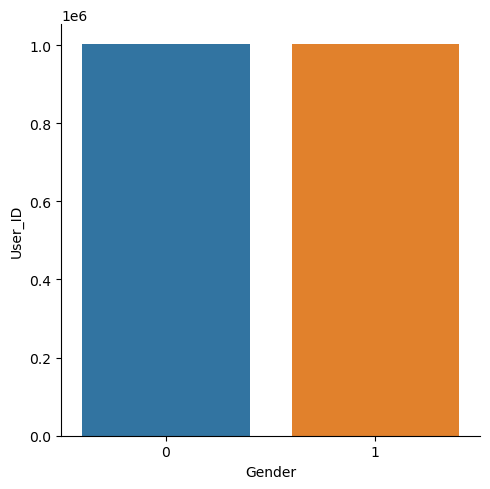

In [22]:
sns.catplot(data=df,x='Gender',y='User_ID',kind='bar')

AttributeError: 'numpy.int32' object has no attribute 'startswith'

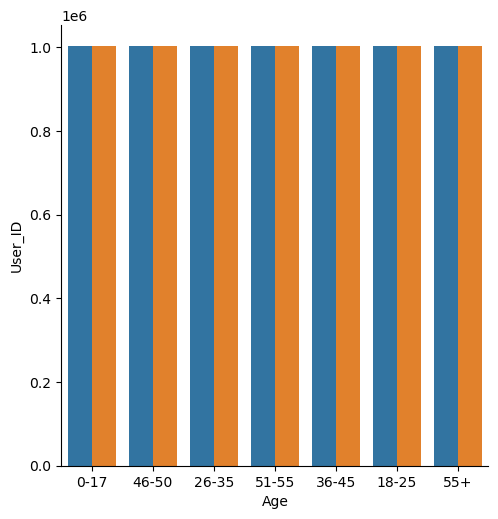

In [39]:
sns.catplot(data=df, x='Age', y='User_ID',hue='Gender', kind='bar')
# plotly

In [23]:
df['Age'].value_counts()

Age
26-35    66942
36-45    33285
18-25    31316
46-50    13374
51-55    11166
55+       5865
0-17      4873
Name: count, dtype: int64

In [24]:
df['Age']=le.fit_transform(df['Age'])

In [25]:
df['Age'].value_counts()

Age
2    66942
3    33285
1    31316
4    13374
5    11166
6     5865
0     4873
Name: count, dtype: int64

In [43]:
##Stats Testing

In [44]:
df=df.loc[(df['Age']==1) & df['Gender']==1]

In [49]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,1000022,P00351142,1,1,15,A,4,0,1,8.0,17.0,12099
103,1000022,P00262242,1,1,15,A,4,0,1,11.0,16.0,12098
111,1000022,P00225842,1,1,15,A,4,0,2,4.0,15.0,9564


In [63]:
sample_size = 1000
pos_mean = 10000

In [64]:
sample = df.sample(sample_size, random_state=0)

In [65]:
df.shape

(24239, 12)

In [60]:
from scipy.stats import ttest_1samp

In [66]:
t_stats, p_value = ttest_1samp(sample['Purchase'],pos_mean)

In [67]:
p_value

1.4097545140748985e-27